# Train a model to predict spam mails

Initialy based on the article [Build a machine learning email spam detector with Python](https://blog.logrocket.com/email-spam-detector-python-machine-learning/)

We need some tools to prepare the raw text data. In this case we use the [Natural Language Toolkit](https://www.nltk.org)

In [230]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/fwolpert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fwolpert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read the mail samples and attach the proper label

In [231]:
import pandas as pd

df1 = pd.read_csv("data/spam.csv")
df1['label'] = True

df1

,from,subject,body,label
0,Sara Sanchez <firenze@defaultsymptom.shop>,This is... HUGE! (literally),i hope this reaches you well someone has just ...,True
1,MaxPhone <info@shelterenlarge.shop>,The Best Value For Money Smartphone Currently ...,previewpng trending internet offer this is the...,True
2,Kelly Reed <elmerarnold@respectsustain.shop>,Harvard Scientist Reveals NEW Memory Breakthrough,hey he was the son of a farmer from a small to...,True
3,"""Dr. Theodore Diktaban"" <schooling@batterycomf...",Is This The WORST Food You Can Possibly Eat?,its sold in almost every supermarket and found...,True
4,Age Defying Energy <ledger@glaciersteward.shop>,3 âHealth Foodsâ That Could Be Killing You,hi my name is dr theo diktaban my patients cal...,True
...,...,...,...,...
394,Backyard Miracle Farm <backyardmiraclefarm@des...,Prepping to Become ILLEGAL?,steps are already been taken to ban pxevfvxgcy...,True
395,Emilia Schaller <pv-angebot@guteswell.com>,Angebot PV-23.4157 vom 16.02.2023 für Ihre Sol...,guten tag rüsten sie jetzt ihr einfamilienhaus...,True
396,Marie von moDecor <sale@modecor.com>,"Exklusiv für Florian, bis zu 88% Karnevals-Rab...",karneval helau alaaf hallo florian spare bis z...,True
397,Joanna Wiedemann <office@reinopels.com>,"Erinnerung: Ihre Programme Word, Excel und Co.",guten tag auch heute können wir unseren sonder...,True


In [ ]:

df2 = pd.read_csv("data/ham.csv")
df2['label'] = False

df2

In [233]:
X = pd.concat([df1['body'],df2['body']]).reset_index(drop=True)
y = pd.concat([df1['label'],df2['label']]).reset_index(drop=True)

X

0      i hope this reaches you well someone has just ...
1      previewpng trending internet offer this is the...
2      hey he was the son of a farmer from a small to...
3      its sold in almost every supermarket and found...
4      hi my name is dr theo diktaban my patients cal...
                             ...                        
595    disney email zwnj zwnj zwnj zwnj zwnj zwnj zwn...
596    hi flo in der anlage vom anhang „tgvertrag“ st...
597    hallo zusammen ich kann inhaltlich zu florians...
598    lieber florian ich finde deinen vorschlag supe...
599    hi maria florian florian mega cool dass du dir...
Name: body, Length: 600, dtype: object

To make the text more useful and valuable for training, we remove stop words and replace some words with their stem.

In [234]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import Cistem

stop_words = set(stopwords.words('german') + stopwords.words('english'))
stemmer = Cistem()

def remove_stopwords_and_build_stem(text):
  result=""
  for word in word_tokenize(text):
    if word not in stop_words:
      result = result + " " + stemmer.stem(word)
  return result

X = X.apply(lambda text: remove_stopwords_and_build_stem(str(text)))


## Split the data into train and test data

We split the data set into 80% data for training and 20% for testing.

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Create a feature set as input for the model

The model works with numbers, so we need to generate numbers from the text. We do this by generating a number for each unique word in the text and counting the occurrences of the word.

In [236]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

features = cv.fit_transform(X_train)

pd.DataFrame(data=features.toarray(),columns=cv.get_feature_names_out())

,aacecefecalcdafbunptpcidemailreceiptxclick,aacecefeppidrtcnacderstadeded,aafcabcffefamptypetoguestwakeup,ab,abandoned,abbestell,abbuchung,abcheck,abdeck,abdomax,...,zweigniederlassung,zweisprachig,zwischensumm,zwischenzeitlich,zwnj,zwpghkjkyrehmoxneusnnrupxgjfhhrkksdfbgasypdzlosdcxy,zxsweogdnrmswhdphdlcvimgsaernxlkqaabujwcfmqomvvtscvzvwacmqdo,zxtipnbhcumxuypwfdwgxirgaikfsbxztrzebtvipcqzeoetzfnjfxzniviyybbooggsbdrgokscrumwa,zysvpvnkabfrbumduodefqgddcolugpkssefsjgtvtqeajcglwexgyuoeijbsctkntzfnxvyvhqsoinuklxtzivsdanjqxxhugktnzclzxavccutcbpq,å¾
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
cv.get_feature_names_out()

array(['aacecefecalcdafbunptpcidemailreceiptxclick',
       'aacecefeppidrtcnacderstadeded', 'aafcabcffefamptypetoguestwakeup',
       ...,
       'zxtipnbhcumxuypwfdwgxirgaikfsbxztrzebtvipcqzeoetzfnjfxzniviyybbooggsbdrgokscrumwa',
       'zysvpvnkabfrbumduodefqgddcolugpkssefsjgtvtqeajcglwexgyuoeijbsctkntzfnxvyvhqsoinuklxtzivsdanjqxxhugktnzclzxavccutcbpq',
       'å¾'], dtype=object)

## Train model

In [238]:
from sklearn import svm

model = svm.SVC()
model.fit(features,y_train)

SVC()

## Check score

In [239]:
features_test = cv.transform(X_test)
print(model.score(features_test,y_test))

0.9666666666666667


## Run prediction on test data and plot confusion matrix

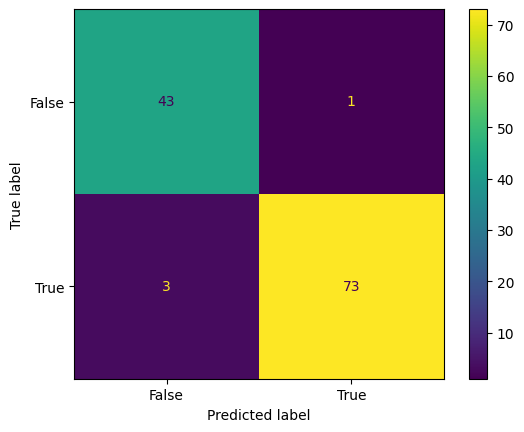

In [240]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(features_test)

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [241]:
import pickle

pickle.dump(cv,open('data/cv.pkl','wb'))
pickle.dump(model,open('data/model.pkl','wb'))